# 0: Preliminaries

We will need to grab the data for this part of the workshop from Github.  You will not need an account to get the data, but we will instead pull this data directly into our Hub.

### TASK 1: OPEN A TERMINAL

* CLICK THE BLUE `+` BUTTON IN THE TOP LEFT OF YOUR WORKSPACE
* SCROLL DOWN AND CLICK THE TERMINAL ICON

### TASK 2: CLONE GITHUB DATA FILES USING TERMINAL
* TYPE: `git clone https://github.com/kmaull-ucar/`

# 1: Our First Data File


We have seen what a CSV file looks like, but let's use Jupyter to inspect it first ...

### TASK 1: OPEN THE DATA FILE `intro_data/logins.csv` IN THE JUPYTER TEXT EDITOR

Jupyter comes with a built in text editor.  You might actually miss it if you move too fast.

* RIGHT-CLICK on any file and choose "Open with..."->"Editor"

### TASK 2: OPEN THE DATA FILE `intro_data/logins.csv` IN THE JUPYTER CSV VIEWER

* just double click the file

# 2: Using Pandas To Read Data

### TASK: READ THE CSV FILE IN `intro_data/logins` USING PANDAS

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("intro_data/logins/sample.csv")

In [5]:
df

,UserID,FirstName,LastName,Email,LastLoginDate
0,101,Alice,Smith,alice.smith@example.com,2023-01-15
1,102,Bob,Johnson,b.johnson@example.net,2023-02-20
2,103,Carol,Williams,carol.w@example.org,2023-03-10
3,104,David,Brown,david.brown123@example.com,2023-04-05
4,105,Eve,Jones,eve.j@example.net,2023-05-22
5,106,Frank,Garcia,frank.g@example.org,2023-06-18
6,107,Grace,Miller,grace.miller@example.com,2023-07-01
7,108,Henry,Davis,h.davis@example.net,2023-08-11
8,109,Ivy,Rodriguez,ivy.r@example.org,2023-09-25
9,110,Jack,Wilson,jack.wilson@example.com,2023-10-30


# 3: Using Pandas To  Read More Data

Suppose we have some data files that contain temperature data from US National Parks (hint there's some in `intro_data/parks`.

Now CSV serves as a great format to store such data ...

### TASK 1: USE THE BUILT IN JUPYTER TOOLS OPEN A FEW OF THE FILES IN `intro_data/parks` TO SEE WHAT IS IN THEM ...

### TASK 2: LOAD A PARKS DATA FILE USING PANDAS

In [6]:
import pandas as pd

In [10]:
df1 = pd.read_csv("intro_data/parks/Acadia-National-Park_291.72657_44.338974_.csv")

In [11]:
df1

,time,air
0,2013-01-01 00:00:00,264.29
1,2013-01-01 06:00:00,266.40
2,2013-01-01 12:00:00,269.29
3,2013-01-01 18:00:00,268.70
4,2013-01-02 00:00:00,262.20
...,...,...
2915,2014-12-30 18:00:00,259.99
2916,2014-12-31 00:00:00,258.79
2917,2014-12-31 06:00:00,256.09
2918,2014-12-31 12:00:00,256.49


### TASK 3: LOAD ANOTHER PARKS DATA FILE AND MERGE WITH THE FIRST

In [12]:
df2 = pd.read_csv("intro_data/parks/Bryce-Canyon-National-Park_247.812668_37.593048_.csv")

In [13]:
df2

,time,air
0,2013-01-01 00:00:00,266.10
1,2013-01-01 06:00:00,261.29
2,2013-01-01 12:00:00,260.40
3,2013-01-01 18:00:00,263.50
4,2013-01-02 00:00:00,267.20
...,...,...
2915,2014-12-30 18:00:00,264.99
2916,2014-12-31 00:00:00,267.89
2917,2014-12-31 06:00:00,264.39
2918,2014-12-31 12:00:00,264.79


In [15]:
pd.concat([df1, df2], axis=1)

,time,air,time,air
0,2013-01-01 00:00:00,264.29,2013-01-01 00:00:00,266.10
1,2013-01-01 06:00:00,266.40,2013-01-01 06:00:00,261.29
2,2013-01-01 12:00:00,269.29,2013-01-01 12:00:00,260.40
3,2013-01-01 18:00:00,268.70,2013-01-01 18:00:00,263.50
4,2013-01-02 00:00:00,262.20,2013-01-02 00:00:00,267.20
...,...,...,...,...
2915,2014-12-30 18:00:00,259.99,2014-12-30 18:00:00,264.99
2916,2014-12-31 00:00:00,258.79,2014-12-31 00:00:00,267.89
2917,2014-12-31 06:00:00,256.09,2014-12-31 06:00:00,264.39
2918,2014-12-31 12:00:00,256.49,2014-12-31 12:00:00,264.79


Now, this is looking pretty good, but we have a few issues we might like to address:

1. What if we want to load all of the files into a single DataFrame?
2. What if we want the time to be an index?
3. What if we want the name of the park as the column name?

### TASK 4: LOAD DATAFRAME SUCH THAT TIME IS INDEX AND COLUMN NAME IS THE PARK

In [52]:
park_name = "intro_data/parks/Acadia-National-Park_291.72657_44.338974_.csv".split("/")[-1].split('_')[0]
df_tmp = pd.read_csv("intro_data/parks/Acadia-National-Park_291.72657_44.338974_.csv", header=0, index_col='time', names=['time', park_name])
df_tmp

,Acadia-National-Park
time,
2013-01-01 00:00:00,264.29
2013-01-01 06:00:00,266.40
2013-01-01 12:00:00,269.29
2013-01-01 18:00:00,268.70
2013-01-02 00:00:00,262.20
...,...
2014-12-30 18:00:00,259.99
2014-12-31 00:00:00,258.79
2014-12-31 06:00:00,256.09


### TASK 5: LOAD ALL PARKS DATA FILES AND MERGE THEM SO THE INDEX IS THE TIME AND COLUMN NAMES ARE THE PARK (FROM THE FILE NAME)

We can now put it all together in a magical solution ...

In [39]:
import glob # magical

In [46]:
df = pd.DataFrame() # set up our empty DF

# loop over all files, process the filename, extract the park name, concatenate the DFs
for f in glob.glob("intro_data/parks/*.csv"):
    park_name = f.split("/")[-1].split("_")[0]
    df_tmp = pd.read_csv(f, index_col='time', header=0, names=['time', park_name])
    df = pd.concat([df, df_tmp], axis=1)

In [53]:
df

,Kissimmee-Prairie-Preserve-State-Park,Cherry-Creek-State-Park,Acadia-National-Park,Jackson-Hole,Bryce-Canyon-National-Park
time,,,,,
2013-01-01 00:00:00,292.29,263.90,264.29,258.29,266.10
2013-01-01 06:00:00,291.60,258.20,266.40,253.89,261.29
2013-01-01 12:00:00,292.00,254.50,269.29,256.60,260.40
2013-01-01 18:00:00,296.20,261.79,268.70,256.50,263.50
2013-01-02 00:00:00,294.70,264.20,262.20,260.29,267.20
...,...,...,...,...,...
2014-12-30 18:00:00,297.59,249.29,259.99,251.69,264.99
2014-12-31 00:00:00,295.99,250.39,258.79,252.29,267.89
2014-12-31 06:00:00,294.39,244.89,256.09,246.19,264.39


This is great!  

Now ... what if we want to plot all this ...

### TASK 6: PLOT THE DATA, USING THE INDEX (TIME) AS X-AXIS AND TEMP VALUES AS Y-AXIS

<Axes: xlabel='time'>

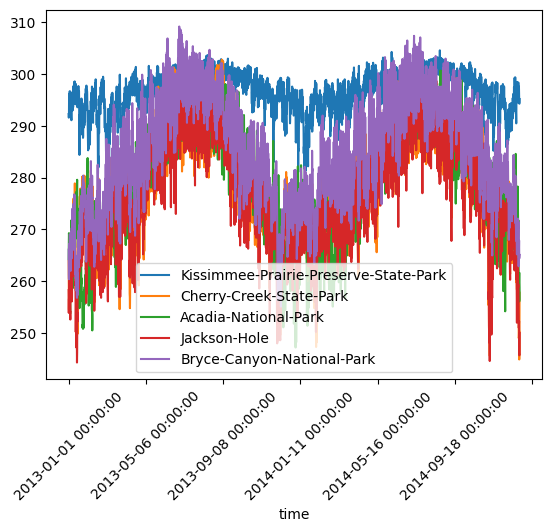

In [51]:
df.plot(rot=45)

$\Xi$
